<a href="https://colab.research.google.com/github/DiahKurnillah/Praktikum-Komputasi-Biomedis/blob/main/KombioPrak_ChapX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 10: Richardson Extrapolation: Derivatives**
---
**Tujuan**: Untuk menentukan turunan numerik menggunakan ekstrapolasi Richardson dan mengetahui kelebihan dan kekurangannya dibandingkan dengan metode turunan numerik lainnya.

**Literature Review**

Ekstrapolasi Richardson adalah metode numerik untuk meningkatkan akurasi. Ekstrapolasi Richardson dapat diterapkan dalam turunan numerik untuk mendapatkan solusi yang lebih akurat. Misalkan $D(h)$ dan $D(2h)$ adalah perkiraan $f'(x0)$ dengan mengambil titik-titik yang masing-masing berjarak h dan 2h. Sebagai contoh, untuk menghitung $f '(x0)$, rumus untuk pendekatan perbedaan pusat $O(h2)$ digunakan:

$$D(h)=\frac{(f_1-f_{-1})}{2h}+O(h^2)$$
$$=f_o'+Ch^2+⋯ 	(1)$$
$$D(2h)=\frac{(f_2-f_{-2})}{2h}+O((2h)^2)$$
$$=f_o'+C(2h)^2+⋯$$
$$=f_o'+4Ch^2+⋯  	(2)$$

Dari persamaan (1) dan (2) akan kita dapatkan

$$D(h)-D(2h)=-3Ch_2$$
$$C=\frac{D(h)-D(2h)}{-3Ch_2 }$$
$$D(h)=f_0'+\frac{[D(h)-D(2h)] h^2}{-3h^2}$$
$$0=f_0'-\frac{1}{3}[D(h)-D(2h)]$$
$$f_0'=D(h)+\frac{1}{3}[D(h)-D(2h)]$$

Ekstrapolasi Richardson dapat diperluas untuk meningkatkan fungsi turunan. Aturan di atas dapat ditulis:
$$f_0'=D(h)+\frac{1}{2^n-1}[D(h)-D(2h)]$$
Dimana n adalah orde kesalahan dari rumus yang digunakan. Sebagai contoh rumus yang digunakan untuk orde beda tengah $O(h^2)$ dalam menghitung $D(h)$ dan $D(2h)$, maka n = 2, sehingga rumus ekstrapolasi Richardson adalah seperti pada persamaan diatas. Perhatikan juga bahwa setiap perluasan ekstrapolasi Richardson akan meningkatkan orde kesalahan dari $O(h_n)$ menjadi $O(h_{n+2})$.


# Preliminary Task
Diberikan data sebagai berikut

|X|	2.0|	2.1|	2.2|	2.3|	2.4|	2.5|	2.6|	2.7|	2.8|	2.9|	3.0|
|----|---------|---------|---------|---------|---------|---------|---------|-----|---------|---------|---------|
|f(x)|	0.42298|	0.40051|	0.37507|	0.34718|	0.31729|	0.28587|	0.25773|	0.22008|	0.18649|	0.15290|	0.11963|

Tentukan f '(2.5) dengan mengekstrapolasi Richardson jika D(h) dan D(2h) dihitung dengan rumus orde beda tengah O(h2) sampai 5 angka penting!


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Data
x_values = [2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
f_values = [0.42298, 0.40051, 0.37507, 0.34718, 0.31729, 0.28587, 0.25773, 0.22008, 0.18649, 0.15290, 0.11963]

# Pilih nilai x=2.5 untuk menghitung f'(2.5)
x_target = 2.5

h = 0.1
D_h = central_difference(lambda x: f_values[x_values.index(x)], x_target, h)

h_2 = 2 * h
D_2h = central_difference(lambda x: f_values[x_values.index(x)], x_target, h_2)

Q_h = (4 * D_2h - D_h) / 3

print(f"f'(2.5) dengan ekstrapolasi Richardson: {Q_h:.5f}")


f'(2.5) dengan ekstrapolasi Richardson: -0.32440


## Task 1
Let assume $D(2h)$ and $D(4h)$ are the approximate derivation of $f '(x0)$ with the interval $2h$ and $4h$ using the formula of the order of center-order $O(h^4)$. By using the Richardson extrapolation, calculate the better estimate of $f '(x0)$: $$𝑓0′=𝐷(2ℎ)+\frac{[𝐷(2ℎ )−𝐷 (4ℎ)]}{15}$$
Determine the approximate derivation of $f '(1.2)$ if the function is $𝑓(𝑥)=𝑒^𝑥$ in the interval $[0.8, 1.6]$ with $h = 0.1.$

Nilai perkiraan dari f'(1.2): 3.324544
Nilai turunan f'x0: 3.320117
Error: 0.004427


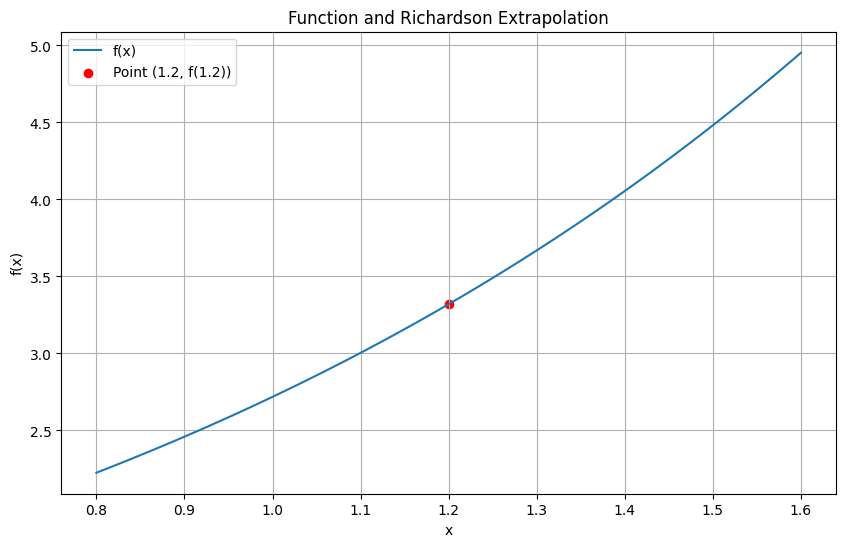

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Define the function f(x)
def f(x):
    return math.exp(x)

# Define the Richardson extrapolation formula
def richardson_extrapolation(D_2h, D_4h):
    return D_2h + (D_2h - D_4h) / 15

# Calculate the central difference approximation of f'(x) with interval 2h
def central_difference_2h(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Calculate the central difference approximation of f'(x) with interval 4h
def central_difference_4h(x, h):
    return (f(x + 2 * h) - f(x - 2 * h)) / (4 * h)

# Given values
x0 = 1.2
h = 0.1

# Calculate D(2h) and D(4h)
D_2h = central_difference_2h(x0, h)
D_4h = central_difference_4h(x0, h)

# Calculate the better estimate of f'(x0) using Richardson extrapolation
f_prime_0 = richardson_extrapolation(D_2h, D_4h)

print(f"Nilai perkiraan dari f'({x0}): {f_prime_0:.6f}")

# Calculate the true derivative at x0
true_derivative = math.exp(x0)

# Calculate the error
error = abs(true_derivative - f_prime_0)

print(f"Nilai turunan f'x0: {true_derivative:.6f}")
print(f"Error: {error:.6f}")

x_values = np.linspace(0.8, 1.6, 100)
y_values = [f(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(x0, f(x0), color='red', marker='o', label=f'Point ({x0}, f({x0}))')
plt.title('Function and Richardson Extrapolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Di dapat nilai $f'(1.2)$ dengan metode Richardson adalah $3.324544$, kemudian kita membandingkan nilai turunan yang didapat dengan nilai turunan jika $f'(1.2)$

Kita mendapatkan hasil sebesar $3.320117$ dengan error $0.004427$

In [ ]:
import numpy as np

def f(x):
  return np.exp(x)

def f_turunan(x):
  return np.exp(x)

def richardson_extrapolation(d2h, d4h):
  return d2h + (d2h - d4h) / 15

x = 1.2
n = (1.6 - 0.8)/ 0.1
h = 0.1
h2 = 2*h
h4 = 4*h

d2h = (f(x + h2) - f(x - h2)) / (2 * h2)
d4h = (f(x + h4) - f(x - h4)) / (2 * h4)

print (f"Nilai dari f'({x}) = {f_turunan(x):.6f}")

# Calculate the better estimate of f'(x0) using Richardson extrapolation
f_prime_0 = richardson_extrapolation(d2h, d4h)

print(f"Nilai perkiraan dari f'({x}) dengan Richardson extrapolation: {f_prime_0:.6f}")
print ("===========================================================================\n")

for k in np.arange(n):
  f0 = d2h + (d2h - d4h)/(2**k - 1)
  error = abs (f_turunan(x) - f0)
  print (f"Orde : {k}")
  print (f"Nilai perkiraan dari f'({x}) dengan Richardson extrapolation: {f0:.6f}")
  print (f"Error : {error:.6f}")
  print ()

Nilai dari f'(1.2) = 3.320117
Nilai perkiraan dari f'(1.2) dengan Richardson extrapolation: 3.337824

Orde : 0.0
Nilai perkiraan dari f'(1.2) dengan Richardson extrapolation: -inf
Error : inf

Orde : 1.0
Nilai perkiraan dari f'(1.2) dengan Richardson extrapolation: 3.275226
Error : 0.044891

Orde : 2.0
Nilai perkiraan dari f'(1.2) dengan Richardson extrapolation: 3.319939
Error : 0.000178

Orde : 3.0
Nilai perkiraan dari f'(1.2) dengan Richardson extrapolation: 3.332714
Error : 0.012597

Orde : 4.0
Nilai perkiraan dari f'(1.2) dengan Richardson extrapolation: 3.337824
Error : 0.017707

Orde : 5.0
Nilai perkiraan dari f'(1.2) dengan Richardson extrapolation: 3.340132
Error : 0.020015

Orde : 6.0
Nilai perkiraan dari f'(1.2) dengan Richardson extrapolation: 3.341231
Error : 0.021114

Orde : 7.0
Nilai perkiraan dari f'(1.2) dengan Richardson extrapolation: 3.341767
Error : 0.021650



<ipython-input-17-4f8f713b421b>:30: RuntimeWarning: divide by zero encountered in double_scalars
  f0 = d2h + (d2h - d4h)/(2**k - 1)
